# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import random
import re
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist') # 53MB .mat file downloaded to data_home
X, Y = mnist.data, mnist.target

In [55]:
# EXPERIMENT CELL: Check out the data to get familiar
# print len(X), len(Y), X.shape, Y.shape

In [3]:
# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

In [56]:
# EXPERIMENT CELL: Figure out how to get indexes of interest
# type(Y)
# vals = np.where(Y == 0)[0]
# len(vals)
# print Y[vals[0]], Y[vals[len(vals)/2]]
# print random.sample(vals, 10)
# print Y[30978], Y[23997]

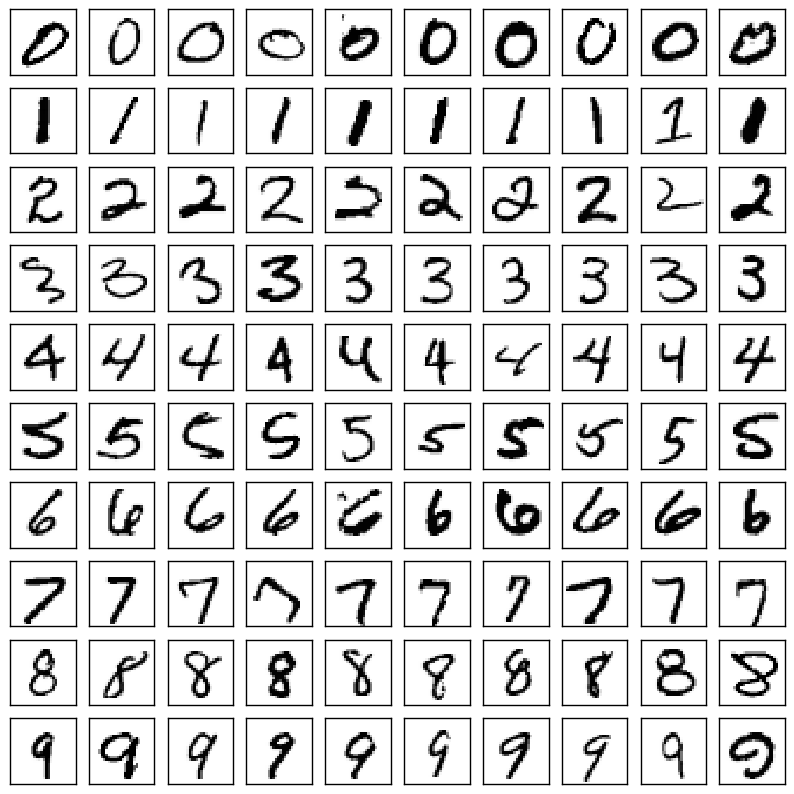

In [4]:
def P1(num_examples=10):
# References:
#   numpy_matplotlib_examples.ipynb
# Time: ~2 hrs

    # Initialize a new plot and set the size large enough so we can see each image.
    num_digits = 10 # number of digits
    plt.figure(figsize=(num_digits, num_examples))

    # Set a black on white colormap.
    plt.rc('image', cmap='Greys', interpolation='none')

    count = 0
    for digit in range(num_digits):
        # randomly chose width index values from Y where value equals digit
        ind_vals = random.sample(np.where(Y == digit)[0], num_examples)
        for index in range(num_examples):
            ax = plt.subplot(num_digits, num_examples, count + 1)
            plt.setp(ax, xticks=(), yticks=())    
            #plt.imshow(np.random.randn(28 * 28, 1).reshape(28, 28))
            plt.imshow(X[ind_vals[index]].reshape(28, 28))
            count += 1

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [5]:
def P2(k_values):
# References:
#   Nearest_Neighbors_with_questions__solution.ipynb
#   http://machinelearningmastery.com/classification-accuracy-is-not-enough-more-performance-measures-you-can-use/
# Time: ~2.5 hrs

    for k in k_values:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(mini_train_data, mini_train_labels)
        preds = neigh.predict(dev_data)    
        print "k =", k, "; accuracy (L1):", np.mean(preds == dev_labels)

    neigh_k1 = KNeighborsClassifier(n_neighbors=1)
    neigh_k1.fit(mini_train_data, mini_train_labels)
    predicted = neigh_k1.predict(dev_data)
    expected = dev_labels
    report = classification_report(expected, predicted)

    # precision - number of positive predictions divided by the total number of positive class values predicted
    # recall - number of positive predictions divided by the number of positive class values in the test data
    # f1 - conveys the balance between the precision and the recall
    print("\nClassification report for classifier %s:\n%s\n" % (neigh_k1, report))
    
    p = re.compile('\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+\s+\d+\.\d+')
    f1scores = [(float(a.split()[0]), float(a.split()[3])) for a in p.findall(report)]
    min_tup = min(f1scores, key = lambda t: t[1])
    print("Digit with min f1-score: %s scored %s\n" % (min_tup[0], min_tup[1]))

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1 ; accuracy (L1): 0.888
k = 3 ; accuracy (L1): 0.878
k = 5 ; accuracy (L1): 0.869
k = 7 ; accuracy (L1): 0.865
k = 9 ; accuracy (L1): 0.863

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


Digit with m

ANSWER: The 8 digit scored the lowest with 0.85 f1-score given a KNeighborsClassifier trained on the mini_train_data using the minkowski metric and a k of 1.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [6]:
def P3(train_sizes, accuracies):
# Time: ~1.5 hrs

    # choose the timer; use time.time for non-windows machines
    default_timer = time.time

    for t in train_sizes:
        # build sample training set given size t
        ind_vals = np.random.choice(np.arange(len(train_labels)), t, replace=False)
        sample_data = train_data[ind_vals]
        sample_labels = train_labels[ind_vals]
        # set classifer with k=1
        neigh = KNeighborsClassifier(n_neighbors=1)
        # fit using the sampled training set
        neigh.fit(sample_data, sample_labels)
        # check and time prediction performance using dev_data
        start = default_timer()
        preds = neigh.predict(dev_data) 
        finish = default_timer()
        # display accuracy and time for the prediction calculation
        acc = np.mean(preds == dev_labels)
        accuracies.append(acc)
        print "training set size =", t, "; accuracy (L1):", acc, "; time(s) =", (finish - start)

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = [] 
P3(train_sizes, accuracies)

training set size = 100 ; accuracy (L1): 0.697 ; time(s) = 0.14191699028
training set size = 200 ; accuracy (L1): 0.785 ; time(s) = 0.276536941528
training set size = 400 ; accuracy (L1): 0.828 ; time(s) = 0.608222961426
training set size = 800 ; accuracy (L1): 0.86 ; time(s) = 1.5605931282
training set size = 1600 ; accuracy (L1): 0.903 ; time(s) = 4.33350300789
training set size = 3200 ; accuracy (L1): 0.928 ; time(s) = 6.96563386917
training set size = 6400 ; accuracy (L1): 0.944 ; time(s) = 13.8260650635
training set size = 12800 ; accuracy (L1): 0.954 ; time(s) = 26.2210559845
training set size = 25000 ; accuracy (L1): 0.973 ; time(s) = 53.6055939198


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

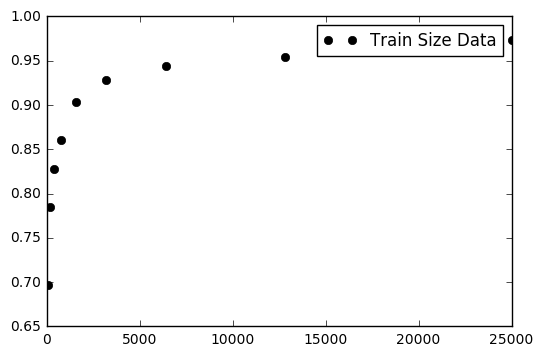

In [63]:
# EXPERIMENT CELL: Plot the data and consider options for processing
X = train_sizes
y = accuracies

plt.figure()
plt.plot(X, y, 'ko', label="Train Size Data")
plt.legend()
plt.show()

# Data looks like a logistic curve or inverse exponential. Perhaps a curve fit to either of those non-linear
# equations would make more sense. 

1 degree polynomial prediction for 60,000: [ 1.26964536]
2 degree polynomial prediction for 60,000: [-0.38628848]
3 degree polynomial prediction for 60,000: [ 14.46593925]
4 degree polynomial prediction for 60,000: [-214.33925643]


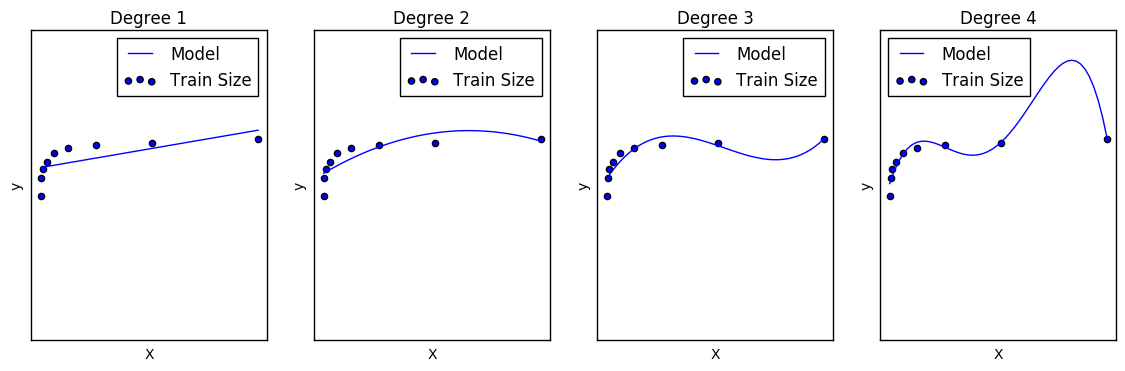

In [68]:
def P4():
# References:
#   Tutorial.ipynb
# Time: ~3.5hrs

    # Below, we'll fit polynomials to the noisy data with these degrees.
    degrees = [1, 2, 3, 4]

    # Initialize a new plot.
    plt.figure(figsize=(14, 4))

    # use the train_sizes and accuracies from P3
    #print train_sizes
    #print accuracies
    
    # transpose train_sizes into a matrix
    X = np.array([train_sizes]).T
    y = accuracies

    # We'll create a subplot for each value of the degrees list.
    for i in range(len(degrees)):
        # The subplots are all on the same row.
        ax = plt.subplot(1, len(degrees), i+1)
    
        # Turn off tick marks to keep things clean.
        plt.setp(ax, xticks=(), yticks=())

        # Set up the polynomial features preprocessor.
        polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)

        # Use the sklearn's Pipeline to string together 2 operations.
        linear_regression = LinearRegression()
        pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])

        pipeline.fit(X, y)
    
        # Take the max and min from the X set
        X_test = np.linspace(100, 25000)
        plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")

        # Output accuracy value predicted for 60000
        print '%s degree polynomial prediction for 60,000: %s' % (i+1, pipeline.predict([[60000]]))

        # Show the original training size data
        plt.scatter(X, y, label="Train Size")

        # Add a few more labels to the plot.
        plt.xlabel("X")
        plt.ylabel("y")
        plt.xlim((-1000, 26000))
        plt.ylim((0, 1.5))
        plt.legend(loc="best")
        plt.title("Degree %d" % degrees[i])

    # Render the plots.
    plt.show()
    
P4()

[ 1.  1.]


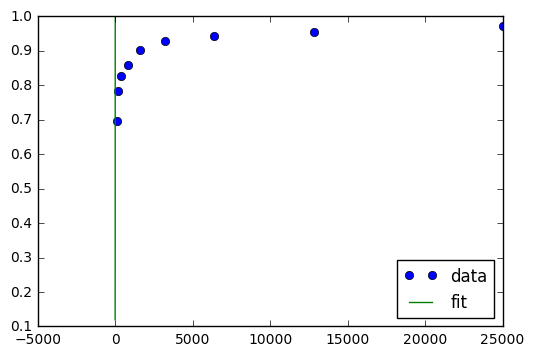

In [62]:
# DELETE ME!!!!!!!! ATTEMPT AT DOING A CURVE FIT USING THE DATA.

import numpy as np
import pylab
from scipy.optimize import curve_fit

def sigmoid(x, x0, k):
     y = 1 / (1 + np.exp(-k*(x-x0)))
     return y

#xdata = np.array([0.0,   1.0,  3.0, 4.3, 7.0,   8.0,   8.5, 10.0, 12.0])
#ydata = np.array([0.01, 0.02, 0.04, 0.11, 0.43,  0.7, 0.89, 0.95, 0.99])
xdata = np.array(train_sizes)
ydata = np.array(accuracies)

popt, pcov = curve_fit(sigmoid, xdata, ydata)
print popt

x = np.linspace(-1, 15, 50)
y = sigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
#pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

ANSWER: A linear polynomial appears to have the best predication answer at 1.26964536 for a 60,000 training set. This not a useful answer as we would expect the accuracy predicted for 60,000 to be close to 1.0 as a maximum. The other three linear regression models were further out of reach for predicted accuracies. An initial viewing of the plotted train_sizes and accuracies shows a nonlinear plot. Perhaps a nonlinear regression would be more suitable; I will return to this problem after taking some time to consider.

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [74]:
def P5():

### STUDENT START ###
    
    # designate 1-NN for the classifer
    neigh_k1 = KNeighborsClassifier(n_neighbors=1)
    # fit to the training data 
    neigh_k1.fit(mini_train_data, mini_train_labels)
    # get the predictions on the dev_data noting it will likely take over a minute on the full training data   
    predicted = neigh_k1.predict(dev_data)
    #print len(predicted), predicted
    expected = dev_labels
    # output the confusion matrix (actual = rows, predicted = columns)
    print("Confusion matrix for classifier %s:\n%s" % (neigh_k1, confusion_matrix(expected, predicted)))
    
    # pick the most confused pair in the matrix (max value not on diameter)
    
    # find the index values of the labels that don't match in predicted and expected
    
    # choose a few random pairs to display
    
    
### STUDENT END ###

P5()

Confusion matrix for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [10]:
#def P6():
    
### STUDENT START ###


### STUDENT END ###

#P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [11]:
#def P7():

### STUDENT START ###


    
### STUDENT END ###

#P7()

ANSWER:

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [12]:
#def P8(alphas):

### STUDENT START ###



### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [14]:
#print nb.best_params_

ANSWER:

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [15]:
#def P9():

### STUDENT END ###


### STUDENT END ###

#gnb = P9()

ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

In [16]:
#def P10(num_examples):

### STUDENT START ###


### STUDENT END ###

#P10(20)

ANSWER:

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [17]:
#def P11(buckets, correct, total):
    
### STUDENT START ###


                
### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()